# Word Cloud

In [1]:
import numpy as np
import pandas as pd
from PIL import Image

In [15]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

In [7]:
# import data imigrasi Canada
df_can = pd.read_excel('data/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

# kita mau drop kolom yang tidak kita pakai
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# merubah nama kolom seperti OdName menjadi Country
df_can.rename(columns={
    "OdName": "Country",
    "RegName": "Region",
    "AreaName": "Continent"
}, inplace=True)

# kita set index nya menggunakan nama negaranya saja
df_can.set_index('Country', inplace=True)

# kita bisa tambahkan kolom Total
df_can['Total'] = df_can.sum(axis=1)

years=range(1980,2014)

In [10]:
df_can.loc[['China','India']]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904


In [9]:
# import package yg diperlukan untuk wordcloud
from wordcloud import WordCloud, STOPWORDS

In [22]:
# kita bikin wordcloud yang menunjukkan negara mana yang paling sering pindah ke Canada
total_immigration = df_can['Total'].sum()

max_words = 9000
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1: # kita mengabaikan semua negara yang bukan 1 kata, mungkin bisa diakalin saja diubah jadi 1 kata seperti United-Kingdom
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
# print(word_string)

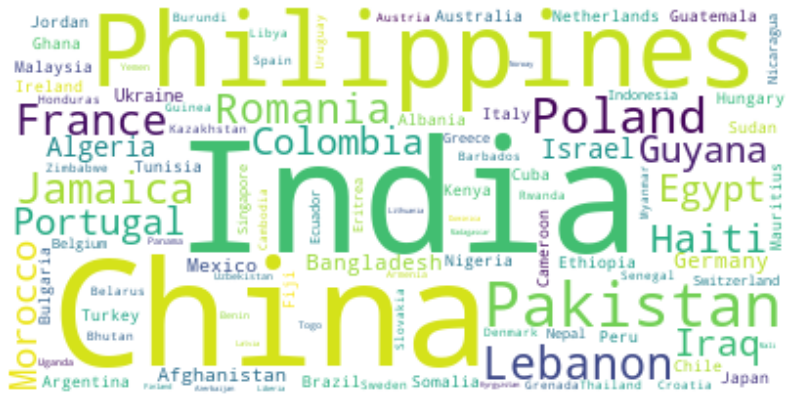

In [23]:
wc_can = WordCloud(background_color="white", collocations=False).generate(word_string)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(wc_can, interpolation='bilinear')
plt.axis('off')
plt.show()

# Alice in Wonderland Word Cloud

In [24]:
alice_novel = open('data/alice_novel.txt', 'r').read()
print(len(alice_novel))

145192


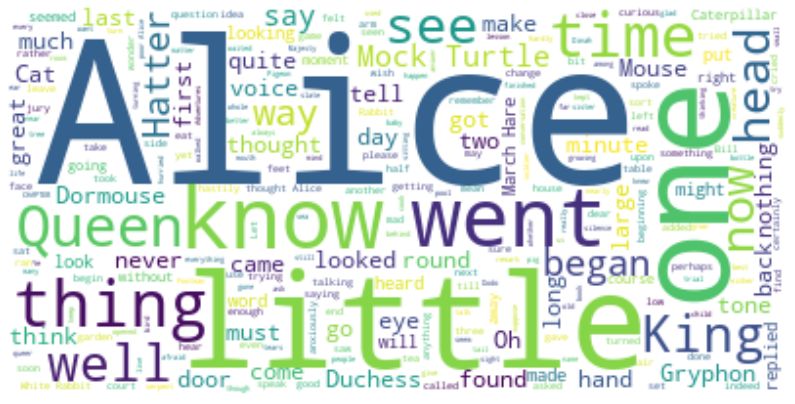

In [38]:
STOPWORDS.add('said')

alice_wc = WordCloud(
    background_color="white",
    max_words=2000, # maximum kata yang muncul di wordcloud nya
    stopwords=STOPWORDS
)

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
STOPWORDS # kata kata penyambung yang tidak mau kita masukkan ke dalam word cloud

In [39]:
## mau buat bentuk wordcloudnya jadi bentuk Alice dengan Rabbit nya
alice_mask = np.array(Image.open('data/alice_mask.png'))
print(alice_mask.shape)

(900, 900)


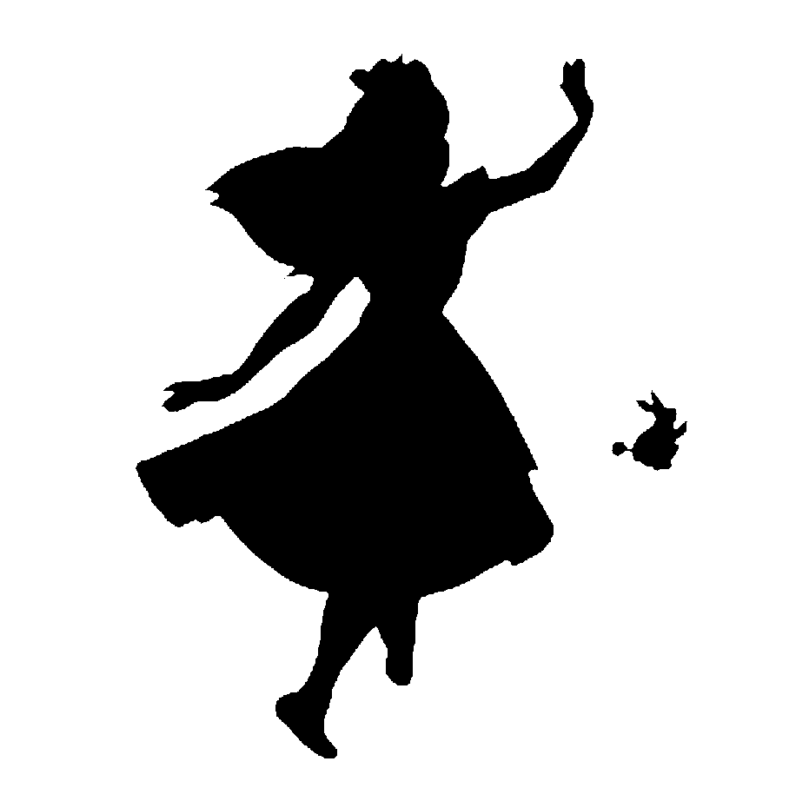

In [40]:
# melihat gambar alice mask nya
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

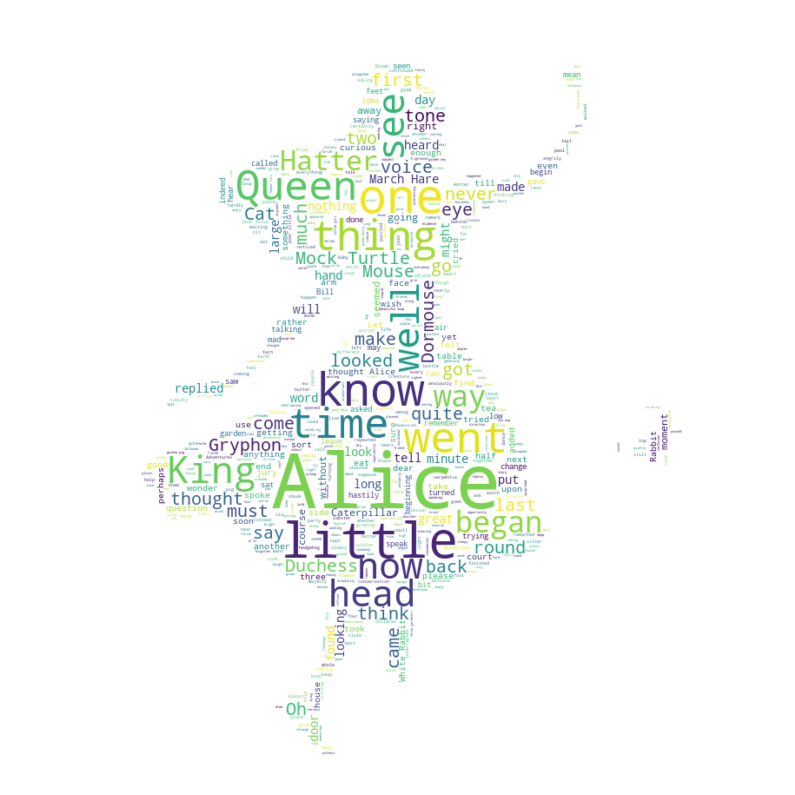

In [41]:
# menggabungkan wordcloud dengan gambar mask nya
alice_wc = WordCloud(
    background_color="white",
    max_words=2000, # maximum kata yang muncul di wordcloud nya
    stopwords=STOPWORDS,
    mask=alice_mask
)

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### dokumentasi WordCloud ada di https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud

# Regression with seaborn

In [43]:
import seaborn as sns

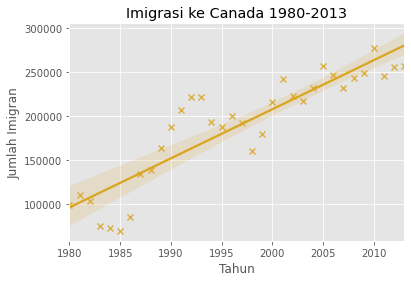

In [53]:
# kita mau ambil data df_total untuk bikin scatterplot
# lalu kita tambahkan garis regression plot

df_can[years] # kita mau cari total imigrasi per tahun untuk seluruh negara
df_tot = pd.DataFrame(df_can[years].sum())
df_tot.reset_index(inplace=True)
df_tot.columns=['year', 'total']
# df_tot.plot(kind="scatter", x="year", y="total", color="goldenrod", marker="+", figsize=(10,6))

# regression plot nya pakai seaborn
ax = sns.regplot(x='year', y='total', data=df_tot, marker="x", color="goldenrod")

plt.title("Imigrasi ke Canada 1980-2013")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")
plt.show()